<a href="https://colab.research.google.com/github/BuiThanhDam02/ML2023/blob/main/Lab_7_20130217_BuiThanhDam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [ ]:
# code
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score ,make_scorer,precision_score
from sklearn import metrics
import numpy as np
from scipy.stats import mode
import pandas as pd
from prettytable import  PrettyTable
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
#code
dataset = datasets.load_iris()
Xtrain = dataset['data']
ytrain = dataset['target']
clf = svm.SVC(kernel="sigmoid",random_state=0)
clf.fit(Xtrain, ytrain)
x_train, x_test, y_train, y_test = train_test_split(Xtrain,ytrain, test_size = 0.3, random_state = 0)


scores = cross_validate(clf,x_train,y_train,scoring='accuracy',cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))



['fit_time', 'score_time', 'test_score']
0.37272727272727274


In [ ]:

cv= KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = svm.SVC (kernel='rbf', random_state=0)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv)

print(scores.mean())

0.9627272727272727


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
#code


rfc=RandomForestClassifier(n_estimators=100)

sfm = SelectFromModel(rfc, threshold=0.01)
Xtrain_new = sfm.fit_transform(Xtrain, ytrain)
rfc.fit(Xtrain_new, ytrain)
x_train, x_test, y_train, y_test = train_test_split(Xtrain_new,ytrain, test_size = 0.3, random_state = 0)

scores = cross_validate(rfc,x_train,y_train,scoring='accuracy',cv=10)

print(sorted(scores.keys()))
print(np.mean(scores['test_score']))
# rfc.fit(Xtrain_new,ytrain)

['fit_time', 'score_time', 'test_score']
0.9689650793650794


In [ ]:

cv= KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(rfc, x_train, y_train, scoring='accuracy', cv=cv)

print(scores.mean())

0.9518181818181818


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [ ]:
# code
dataset = datasets.load_digits()
Xtrain = dataset['data']
ytrain = dataset['target']


kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(dataset.data)
clusters = kmeans.predict(dataset.data)
# kmeans.cluster_centers_.shape

labels = np.zeros_like(clusters)
for i in range(10):
 mask = (clusters == i)
 #print(mask)
 labels[mask] = mode(dataset.target[mask])[0]
 #print(labels[mask])
accKM = accuracy_score(dataset.target, labels)
preKM= metrics.precision_score(dataset.target, labels,average='macro')

recallKM= metrics.recall_score(dataset.target, labels,average='macro')
f1KM = metrics.f1_score(dataset.target, labels,average='macro') 
accKM


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-2-4737323bb15d>:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(dataset.target[mask])[0]


0.7935447968836951

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [ ]:
# Random Forest

rfc=RandomForestClassifier(n_estimators=100)

rfc.fit(Xtrain,ytrain)
x_train, x_test, y_train, y_test = train_test_split(Xtrain,ytrain, test_size = 0.3, random_state = 0)

cv= KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
accRFC = cross_val_score(rfc, x_train, y_train, scoring='accuracy', cv=cv).mean()




# y_predRFC = rfc.predict(x_test)

preRFC= cross_val_score(rfc, x_train, y_train, scoring='precision_macro', cv=cv).mean()

recallRFC= cross_val_score(rfc, x_train, y_train, scoring='recall_macro', cv=cv).mean()

f1RFC = cross_val_score(rfc, x_train, y_train, scoring='f1_macro', cv=cv).mean()


# GaussianNB Naive Bayes

nb = GaussianNB()
nb.fit(Xtrain, ytrain)


y_predNB = nb.predict(x_test)

scores = cross_val_score(nb, x_train, y_train, scoring='accuracy', cv=cv)

accNB =    scores.mean()

preNB= cross_val_score(nb, x_train, y_train, scoring='precision_macro', cv=cv).mean()

recallNB=cross_val_score(nb, x_train, y_train, scoring='recall_macro', cv=cv).mean()
f1NB =cross_val_score(nb, x_train, y_train, scoring='f1_macro', cv=cv).mean()

#Knn
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(Xtrain, ytrain)
y_predKnnBest = knn.predict(x_test)
    
scores = cross_val_score(knn, x_train, y_train, scoring='accuracy', cv=cv)

accKnn =  scores.mean()

preKnn =  cross_val_score(knn, x_train, y_train, scoring='precision_macro', cv=cv).mean()
recallKnn=  cross_val_score(knn, x_train, y_train, scoring='recall_macro', cv=cv).mean()
f1Knn = cross_val_score(knn, x_train, y_train, scoring='f1_macro', cv=cv).mean()

#Table
t3 = PrettyTable(['Name Metric measure','KMean','Random Forest',"Naive Bayes (Gaussian)","Knn"])
t3.add_row(['Accuracy',accKM,accRFC,accNB,accKnn])
t3.add_row(['Precision Score',preKM,preRFC,preNB,preKnn])
t3.add_row(['Recall Score',recallKM,recallRFC,recallNB,recallKnn])
t3.add_row(['F1',f1KM,f1RFC,f1NB,f1Knn])

print(t3)

+---------------------+--------------------+--------------------+------------------------+--------------------+
| Name Metric measure |       KMean        |   Random Forest    | Naive Bayes (Gaussian) |        Knn         |
+---------------------+--------------------+--------------------+------------------------+--------------------+
|       Accuracy      | 0.7935447968836951 | 0.9689714285714285 |   0.8488444444444445   | 0.9824952380952382 |
|   Precision Score   | 0.8049510946090495 | 0.966558411359882  |   0.8631844675792044   | 0.9813171648612824 |
|     Recall Score    | 0.7935735538874538 | 0.971876389992876  |   0.8497928746949646   | 0.9832475996225994 |
|          F1         | 0.7899801068577756 | 0.9709921136764935 |   0.8411400564037403   | 0.9810364517430715 |
+---------------------+--------------------+--------------------+------------------------+--------------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code
# Supervised learning is better than Unsupervised learning because Supervised learning have score metric measure higher than Supervised learning in 4 measure accuracy, precision,recall,f1 .

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [ ]:
dataset = datasets.load_digits()
Xtrain = dataset['data']
ytrain = dataset['target']



cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
x_train, x_test, y_train, y_test = train_test_split(Xtrain,ytrain, test_size = 0.3, random_state = 1)
y_pred= cluster.fit_predict(x_test)
# get clustering labels
cluster.labels_


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 0, 7, 2, 8, 7, 5, 4, 0, 6, 3, 1, 2, 3, 6, 5, 8, 9, 2, 6, 2, 4,
       4, 5, 7, 2, 5, 8, 9, 2, 0, 3, 4, 9, 1, 3, 3, 8, 4, 7, 2, 3, 7, 7,
       3, 2, 1, 2, 6, 9, 6, 9, 6, 7, 6, 2, 7, 0, 0, 0, 1, 4, 2, 7, 0, 4,
       0, 9, 9, 6, 7, 9, 2, 6, 0, 6, 1, 8, 2, 9, 4, 0, 9, 6, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 2, 7, 4, 4, 2, 6, 1, 9, 3, 3, 9, 1, 7, 1, 3, 3, 1,
       9, 1, 3, 8, 4, 3, 1, 1, 7, 6, 4, 0, 6, 6, 2, 5, 2, 5, 5, 4, 2, 0,
       5, 9, 3, 9, 2, 1, 4, 0, 9, 6, 2, 3, 0, 7, 5, 7, 5, 9, 2, 5, 0, 5,
       1, 1, 1, 9, 7, 2, 5, 0, 5, 6, 8, 7, 5, 7, 5, 8, 7, 8, 1, 0, 8, 1,
       9, 4, 8, 7, 2, 5, 1, 3, 9, 0, 9, 6, 5, 9, 9, 2, 6, 2, 1, 2, 5, 4,
       5, 4, 8, 7, 9, 0, 7, 3, 3, 3, 7, 8, 1, 5, 3, 7, 8, 0, 3, 3, 1, 1,
       3, 1, 7, 4, 2, 2, 7, 9, 9, 3, 5, 9, 9, 1, 3, 1, 5, 3, 7, 6, 1, 1,
       2, 3, 1, 5, 2, 5, 1, 2, 0, 3, 9, 6, 7, 5, 6, 3, 0, 9, 5, 9, 1, 6,
       7, 6, 6, 3, 2, 2, 4, 0, 1, 2, 7, 3, 7, 6, 6, 7, 8, 7, 5, 6, 4, 3,
       0, 7, 3, 5, 7, 4, 4, 1, 7, 3, 0, 5, 4, 7, 0,

In [ ]:
acc =  accuracy_score(y_test, y_pred)
pre= metrics.precision_score(y_test, y_pred,average='macro')

recall= metrics.recall_score(y_test, y_pred,average='macro')
f1 = metrics.f1_score(y_test, y_pred,average='macro') 
print("Accuracy")
print(acc)
print("Precision")
print(pre)
print("Recall")
print(recall)
print("F1")
print(f1)

Accuracy
0.025925925925925925
Precision
0.02160714285714286
Recall
0.027614795918367345
F1
0.024224012679963013


#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [ ]:
#code

from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ColabNotebooks'

dataset=pd.read_csv("shopping-data.csv")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ColabNotebooks


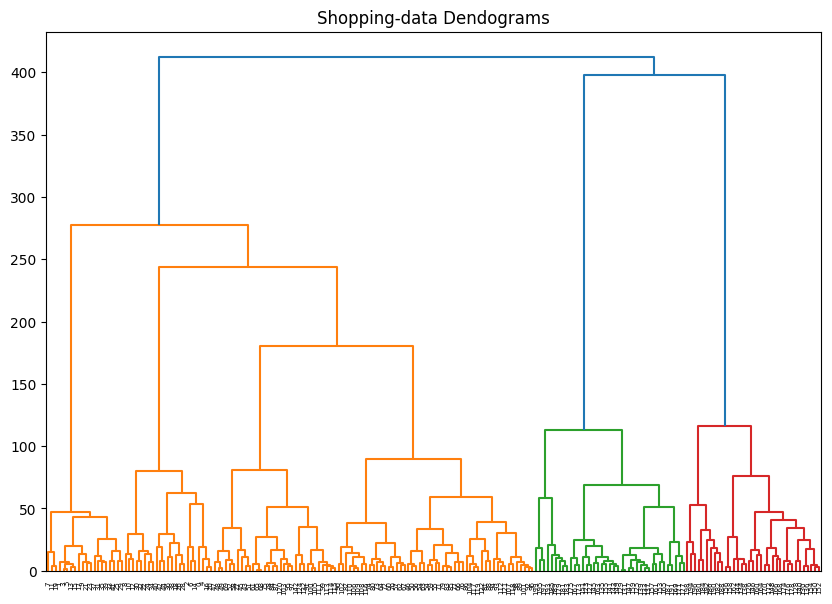

In [25]:
df = dataset.drop(columns=['CustomerID', 'Genre'])

plt.figure(figsize=(10, 7))
plt.title("Shopping-data Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

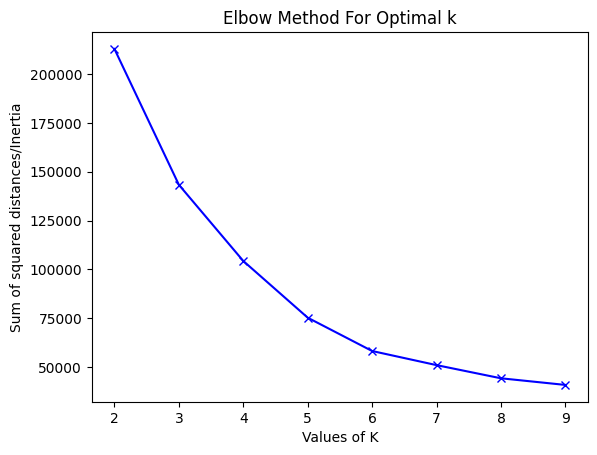

In [27]:
#code

sse = []
K = range(2,10)
for k in K:
 kmeans = KMeans(n_clusters=k, random_state = 0)
 kmeans.fit(df)
 sse.append(kmeans.inertia_)
plt.plot(K,sse,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()  

In [ ]:
# Best K = 5

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [39]:
#code
Xtrain = df.iloc[:,0:2]
ytrain = df.iloc[:,2:3]

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
x_train, x_test, y_train, y_test = train_test_split(Xtrain,ytrain, test_size = 0.3, random_state = 0)
y_pred= cluster.fit_predict(x_test)

acc =  accuracy_score(y_test, y_pred)
pre= metrics.precision_score(y_test, y_pred,average='macro')

recall= metrics.recall_score(y_test, y_pred,average='macro')
f1 = metrics.f1_score(y_test, y_pred,average='macro') 
print("Accuracy")
print(acc)
print("Precision")
print(pre)
print("Recall")
print(recall)
print("F1")
print(f1)

Accuracy
0.03333333333333333
Precision
0.0065359477124183
Recall
0.029411764705882353
F1
0.010504201680672268


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Finally,
Save a copy in your Github. Remember renaming the notebook.